# 作業

In [1]:
class Student(object):
    def __init__(self, name):
        self.name, self.grades = name, []
    def append_grade(self, grade):
        self.grades.append(grade)
    def average(self):
        return sum(self.grades) / len(self.grades)
    def letter_grade(self):
        average = self.average()
        for value, grade in (90, "A"), (80, "B"), (70, "C"), (60, "D"):
            if average >= value:
                return grade
        else:
            return "F"
def print_report(a_class):
    print()
    print('班級清單')
    print()
    for student in a_class:
        print(f'學生: {student.name} 成績:{student.grades} 平均成績: {student.average():.2f}  等第: { student.letter_grade()}')
    print()
    print(f'班級平均成績 {class_average(a_class):.2f}')

def class_average(a_class):
    if len(a_class) == 0:
        return 0    
    return sum(student.average() for student in a_class) / len(a_class)

print('班上學生考試資訊:')
a_class = []  # "class" by itself is a reserved word in Python, avoid using
while True:
    print()
    print(f'學生人數{len(a_class)}人')
    another_student = input('輸入新的學生資料 (y/n) ? ')
    if another_student[0].lower() != 'y':
        break
    print()
    student_name = input('輸入學生姓名: ')
    a_class.append(Student(student_name))
    print()
    print('學生:', student_name)
    print('-------------------')
    number_of_tests = int(input('考試科目有幾科? : '))
    for test_num in range(1, number_of_tests+1):
        print(f'科目 {test_num} 分數', end='')
        score = float(input(' : '))
        if score < 0:
            break
        a_class[-1].append_grade(score) 
print_report(a_class)

班上學生考試資訊:

學生人數0人
輸入新的學生資料 (y/n) ? y

輸入學生姓名: Ken

學生: Ken
-------------------
考試科目有幾科? : 2
科目 1 分數 : 80
科目 2 分數 : 20

學生人數1人
輸入新的學生資料 (y/n) ? y

輸入學生姓名: Vivin

學生: Vivin
-------------------
考試科目有幾科? : 3
科目 1 分數 : 90
科目 2 分數 : 70
科目 3 分數 : 30

學生人數2人
輸入新的學生資料 (y/n) ? n

班級清單

學生: Ken 成績:[80.0, 20.0] 平均成績: 50.00  等第: F
學生: Vivin 成績:[90.0, 70.0, 30.0] 平均成績: 63.33  等第: D

班級平均成績 56.67


### JSON
+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容
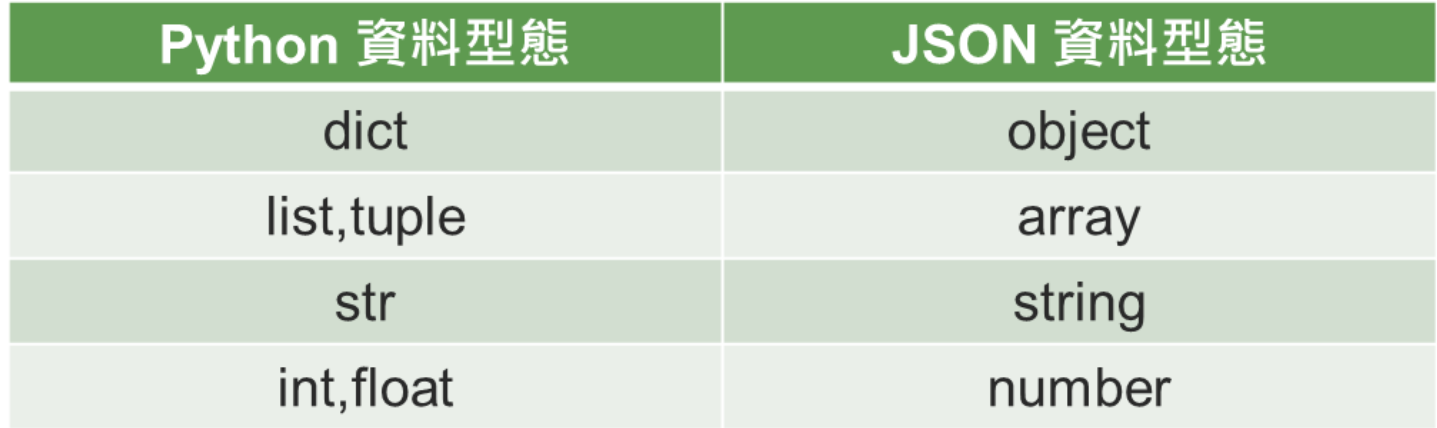
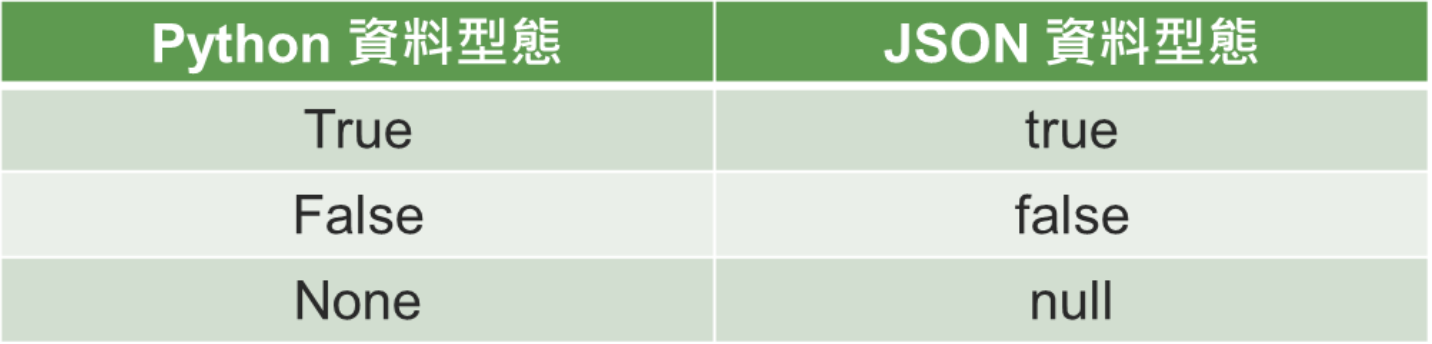

In [3]:
import json
json1 = {"Python":"課程","price":100,'java_class':False}
with open('data0.json','w',encoding='utf-8') as outfile:
    json.dump(json1,outfile,ensure_ascii=False)

In [11]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
#indent json 輸出可斷行縮排
with open('data.json','w',encoding='utf-8') as outfile:
    json.dump(data,outfile,ensure_ascii=False,indent=5)
jsonStr = json.dumps(data,indent=1)
print(jsonStr)

{
 "people": [
  {
   "name": "Scott",
   "website": "stackabuse.com",
   "from": "Nebraska"
  },
  {
   "name": "Larry",
   "website": "google.com",
   "from": "Michigan"
  }
 ]
}


### 自訂物件轉JSON

In [17]:
import json
class Student:
    def __init__(self,name,age):
        self.name = name
        self.age = age        
    def __str__(self):
        return f"{self.name}:{self.age}"
    def toJson(self):
        return  json.dumps(self.__dict__,ensure_ascii=False)
st = Student("Ken",25)
print(st)
print(st.__dict__)
jsonStr = json.dumps(st.__dict__,ensure_ascii=False)
print(jsonStr)
print(st.toJson())

Ken:25
{'name': 'Ken', 'age': 25}
{"name": "Ken", "age": 25}
{"name": "Ken", "age": 25}


### Json 轉為 Python物件(反序列化)
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [19]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
pyObj = json.loads(json1)
print(type(pyObj))
print(pyObj)

<class 'dict'>
{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}


In [21]:
import json
with open('data.json') as jsonfile:
    data = json.load(jsonfile)
    print(type(data))
    for k in data:
        print(f'{k}-{data[k]}')

<class 'dict'>
people-[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]


### JSON轉自訂物件

In [24]:
import json
class Student:
    def __init__(self,data):
      print("data:",data) 
      self.__dict__ = data
    def __str__(self):
        return f"Name:{self.name} Age:{self.age} Skill:{self.skill}"
json1 = '{"name":"Ken","age":25,"skill":["python","java"]}'
obj = json.loads(json1,object_hook=Student)
print(obj)

data: {'name': 'Ken', 'age': 25, 'skill': ['python', 'java']}
Name:Ken Age:25 Skill:['python', 'java']


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [27]:
import os
class tryopenfile:
    def openfile(self,filePath):
        self.handle = open(filePath,'w')
        #self.handle.close()
    pass

t = tryopenfile()
filePath = 'test.txt'
 #建立文件物件
t.openfile(filePath)
#刪除文件 PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'
os.remove(filePath)
print('success')

PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'

## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [28]:
import os
class tryopenfile:
    def openfile(self, filePath):
        with open(filePath, 'w', encoding="utf8") as f:
            f.write("中文3")#離開方法前一定關閉
    pass
t = tryopenfile( )
filePath = 'test.txt'
t.openfile(filePath)
os.remove(filePath)
print('success')


success


## Numpy
+ 可做到的功能
  + 快速的多維陣列操作。
  + 可靠的科學功能函數庫。
  + 可協助繪圖工具進行繪圖。
+ NumPy 是幾乎每個科學 Python 應用程序或模組的核心，它提供了以向量化形式的快速 N-d 陣列類型可供操作。

In [31]:
import numpy as np
a = np.array([1,3,5,7,9])
b = np.array([3,5,6,7,9])
c = a +b
print(c)
c = a - b
print(c)
print(type(a))

[ 4  8 11 14 18]
[-2 -2 -1  0  0]
<class 'numpy.ndarray'>


## Numpy 建立與計算

+ ndarray.ndim
   + 維度的數量。
+ ndarray.shape
   + 顯示出陣列在每個維度上的整數值。
+ ndarray.size
   + 陣列內元素的總數。
+ ndarray.dtype
   + 用來描述陣列中元素類型的對象。


In [36]:
import numpy as np
#2 x 3
i = [[1,2,3],
     [2,3,4]]
a = np.array(i,dtype=np.uint8)
print(a)
print("ndim:",a.ndim)#維度的數量 也可稱為軸的數量
print("shap:",a.shape)
print("size:",a.size)
print("dtype:",a.dtype)

[[1 2 3]
 [2 3 4]]
ndim: 2
shap: (2, 3)
size: 6
dtype: uint8


## 陣列初始化與重新規劃
+ 針對初始化這部分提供了多種方式：
+ 不做初始化
   + 例如：np.empty((2,4))
+ 全部規劃為 0
   + 例如：np.zeros((3,4))
+　全部規劃為 1
  + np.ones((5,2))
+ 全部規劃／填滿為某數，例如 6
   + 例如： np.full((3,3),6)
+ 建立對角矩陣，對角皆為 1，其他為 0
   + 例如： np.eye(3)
+ 建立對角矩陣，對角為 1,2,3,4，其他為 0
   + 例如： np.diag([1,2,3,4])
+ reshape((x,y)) 這個指令就可以將現有的陣列  重新規劃為 x 乘以 y 的陣列。 
+ np.arange(起始值, 結束值, 固定間隔)：也是產生一維陣列，和 np.array( ) 的差別在於 arange 擁有較大的彈性，而且元素數值是自動化產生。
+ np.linspace(起始值, 結束值, 起始與結束的區間內要產生幾個元素 )：只要給定陣列的區間(起始值、結束值)，就可以要求在這個區間內產生幾個元素。
+ arange(a,b,c)
   + 不包含 b 由 a 開始 以固定間隔 c 來取值
+ linspace(a,b,c,)
   + 包含 b 由 a 開始 切割成 c 個資料
+ linspace(a,b,c,endpoint=False)
   + 不包含 b 由 a 開始 切割成 c 個資料

In [41]:
import numpy as np
x = np.empty((2,4))
print(x)
x = np.zeros((3,4))
print(x)
c = np.ones((5,2))
print(c)

[[1.31897806e-311 1.31897806e-311 1.31897752e-311 1.31897752e-311]
 [1.31897752e-311 1.31897752e-311 1.31897752e-311 1.31897752e-311]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


### eye diag

In [43]:
import numpy as np
x = np.eye(3)
print(x)
x = np.diag([1,2,3,4])
print(x)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


### linspace arange

In [52]:
import numpy as np
x = np.linspace(1,10,6)
print(x)
print("=======================")
x = np.linspace(1,10,6).reshape(3,2)
print(x)
print("=======================")
x = np.linspace(1,10,6,endpoint=False)#不包含到10
print(x)
print("=======================")
x = np.arange(8).reshape((2,4))
print(x)
print("=======================")
x = np.arange(25,30,.5)
print(x)

[ 1.   2.8  4.6  6.4  8.2 10. ]
[[ 1.   2.8]
 [ 4.6  6.4]
 [ 8.2 10. ]]
[1.  2.5 4.  5.5 7.  8.5]
[[0 1 2 3]
 [4 5 6 7]]
[25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5]


In [57]:
import numpy as np
a = np.array([6,7,8,9])
b = np.arange(4)
c = a - b
print("a:",a)
print("b:",b)
print("c:",c)
d = b ** 2
print("d:",d)
f = np.array([5,-1,3,9,0])
print("f<=3:",f<=3)
f[f <=3] = 2 #小於等於３都改２
print("f:",f)

a: [6 7 8 9]
b: [0 1 2 3]
c: [6 6 6 6]
d: [0 1 4 9]
f<=3: [False  True  True False  True]
f: [5 2 2 9 2]


### Q. 請問以下的程式執行後值是多少?(選擇題)

In [58]:
import numpy as np
a = np.array( [6, 7, 8, 9] )
a += 2
print(a)

[ 8  9 10 11]


## 陣列指定位置取值
+ 間隔選取 [::c]
  + 以 1 維陣列來說明 x[a:b:c]
  + a：選取資料的起始索引
  + b：選取資料的結束索引 +1
  + c：選取資料間隔，以索引值可以被此值整除的元素，不指定表示 1
+ 倒序 [::-1]
  + 只是單純的把順序反過來

## 陣列指定位置-給予一個整數
+ 關於指定位置  [row,column]
+ 假設給予一個整數為 N
 + 如果是給固定的 N，那就代表 row 或 column 等於 N。
 + 如果是 N：，那就代表 row 或 column 大於等於 N 的區域。
 + 如果是：N，那就代表 row 或 column 小於 N 的區域。 
 + 如果是：，那就代表 row 或 column 是任意欄位。

In [63]:
import numpy as np
a = np.array([[1,2,3],
              [3,6,9],
              [2,4,6]])
print(a)
print("==================")
print(a[1])
print("==================")
print(a[1,2])

[[1 2 3]
 [3 6 9]
 [2 4 6]]
[3 6 9]
9


In [68]:
import numpy as np
a = np.array([[1,2,3],
              [3,6,9],
              [2,4,6]])
print(a[1,1:3])
print("=================")
print(a[:,1])
print("=================")
a[1,2] = 7
print(a)
print("=================")
a[:,0] = [0,9,8]
print(a)
print("=================")

[6 9]
[2 6]
[[1 2 3]
 [3 6 7]
 [2 4 6]]
[[0 2 3]
 [9 6 7]
 [8 4 6]]
